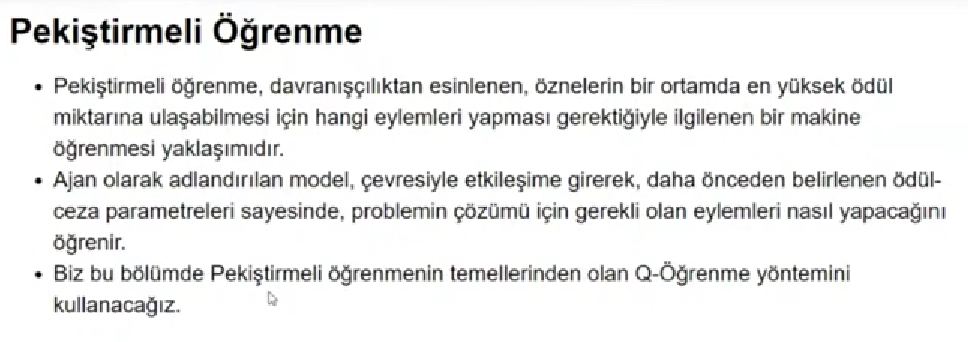

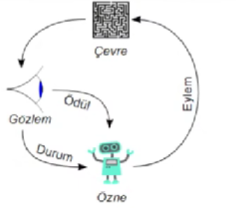

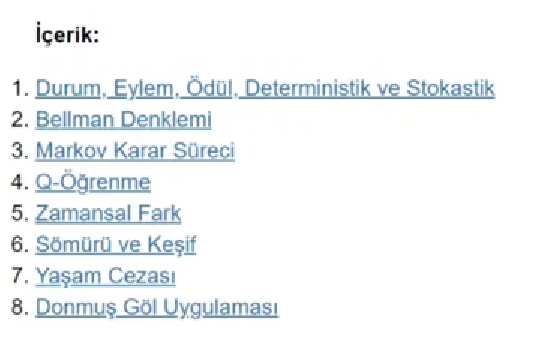

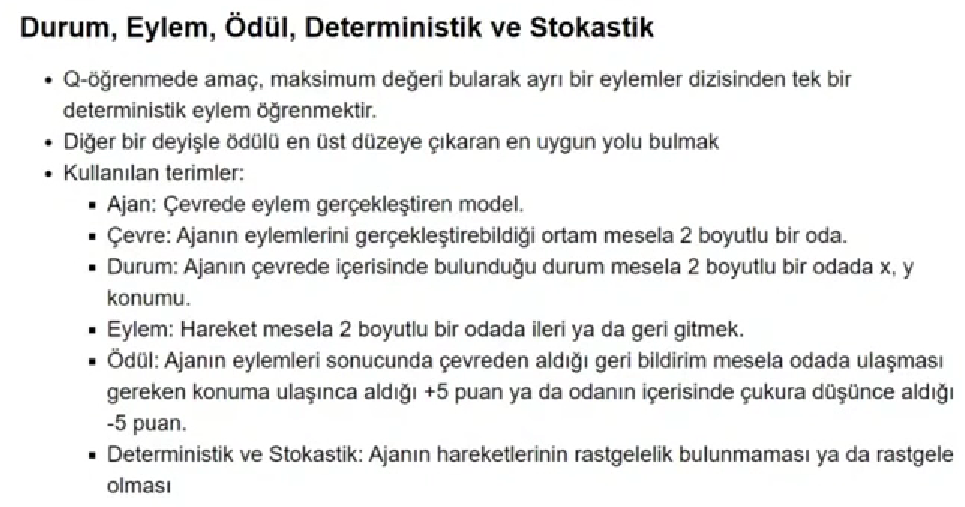

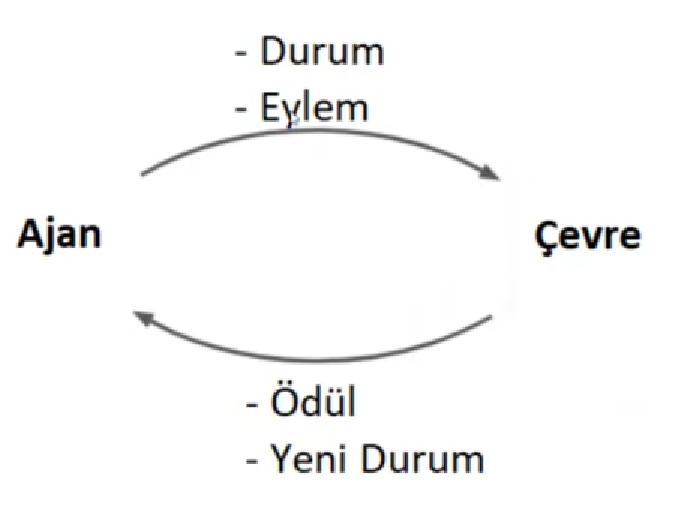

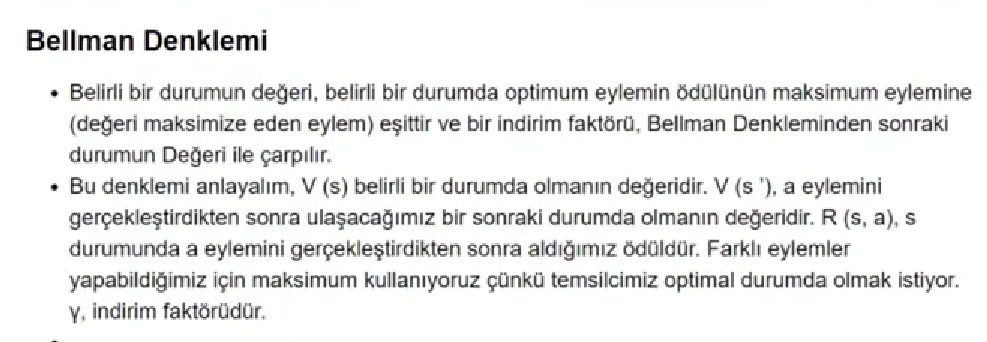

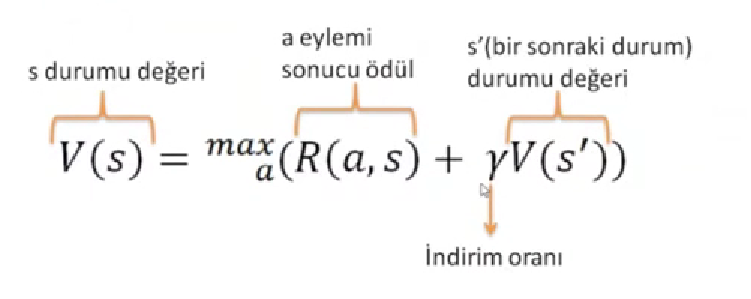

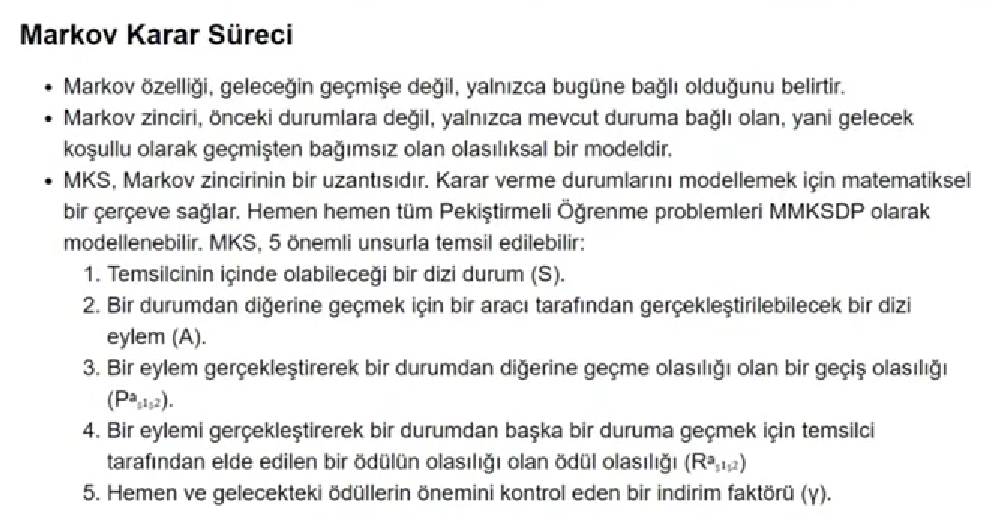

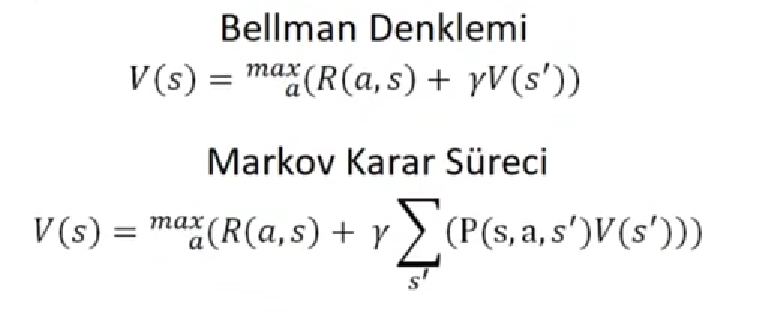

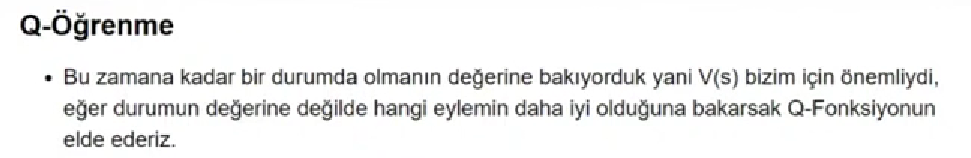

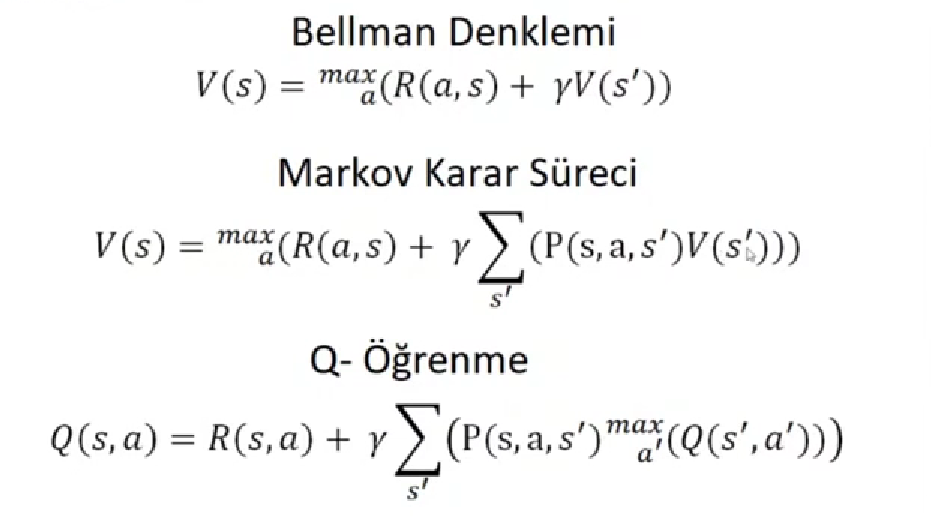

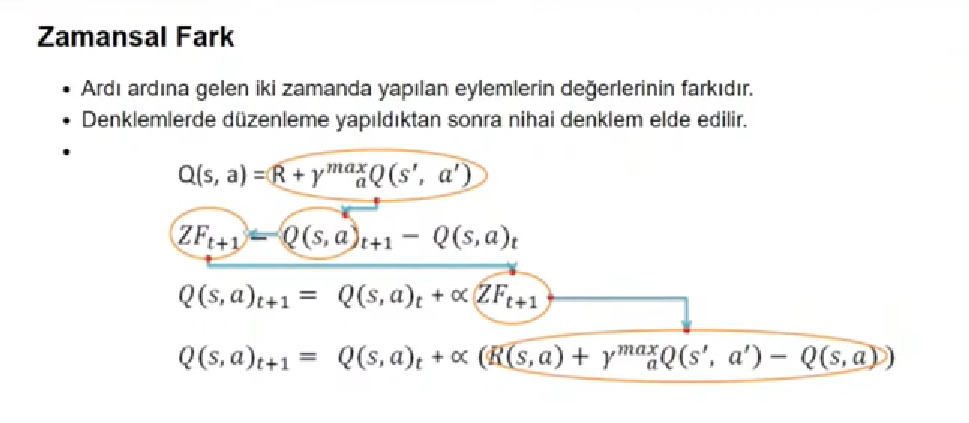

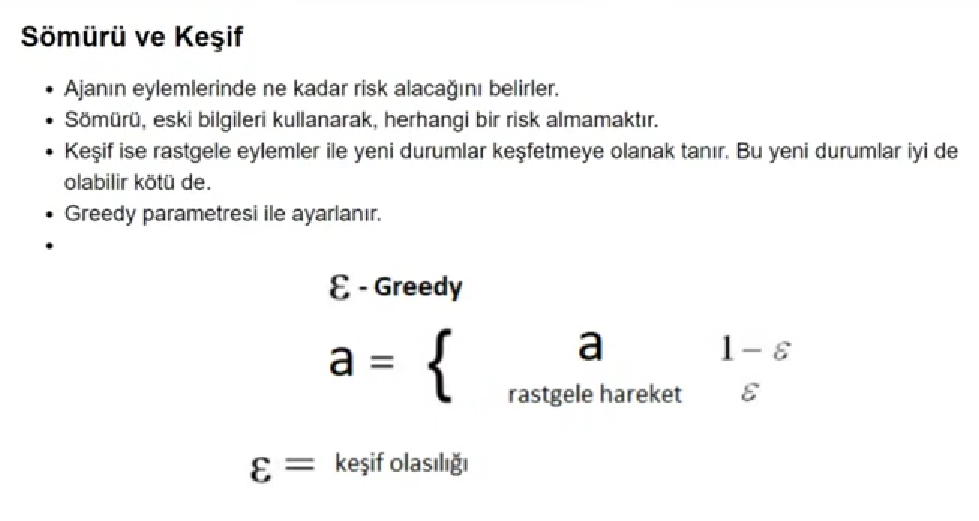

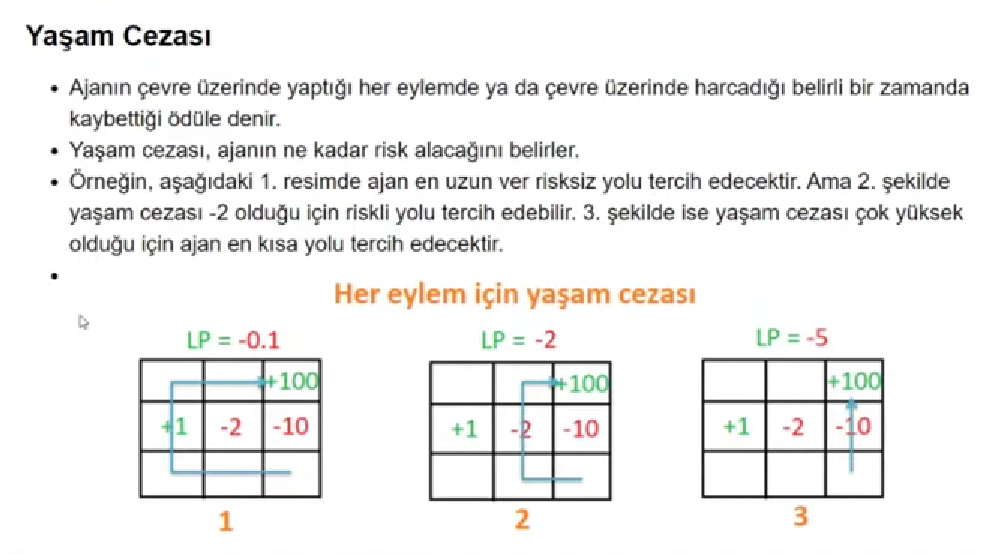

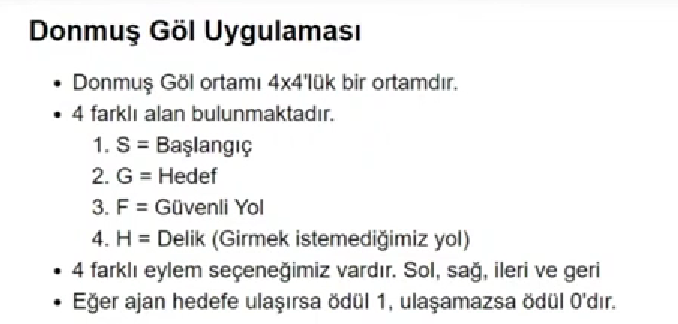

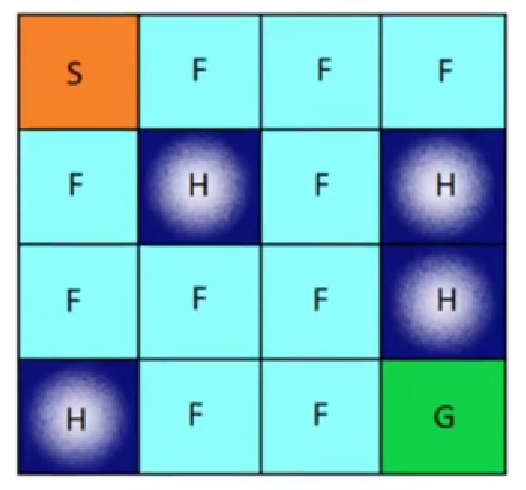

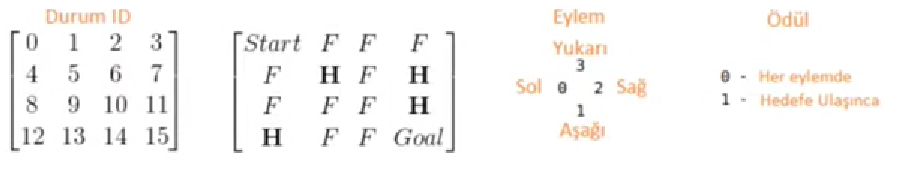

In [5]:
# Load libraries
import gym  # pip install gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize the environment
env = gym.make('FrozenLake-v1')
env

# Create Q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:

print(gym.__version__)

0.21.0


In [7]:
# Hyperparameters
gamma = 0.6
alpha = 0.1
epsilon = 0.1

# Create a list to visualize rewards
reward_list = []

In [8]:
# Start learning
episode_number = 100001  # Let there be 100000 episodes
for i in range(1, episode_number):

    state = env.reset()  # Reset the environment at the beginning of each episode

    reward_count = 0
    while True:

        # 10% exploration, 90% exploitation rate
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            #print(f"State: {state[:,]}, Q-table shape: {q_table.shape}")
            action = np.argmax(q_table[state])
            

        # Take an action within the environment, get the next state and reward in return
        next_state, reward, done, _ = env.step(action)
        #encoded_next_state = encode_state(next_state)

        # Q-learning function
        old_value = q_table[state, action]  # old_value
        next_max = np.argmax(q_table[next_state])  # next_max

        next_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

        # Update Q table
        q_table[state, action] = next_value

        # Update state
        state = next_state

        # Calculate total reward
        reward_count += reward

        # If the episode is done, break and start a new episode
        if done:
            break

    # Print episode number every 5000 episodes
    if i % 5000 == 0:
        print("Episode: {}".format(i))

    # Append reward count to the list every 1000 episodes
    if i % 1000 == 0:
        reward_list.append(reward_count)

Episode: 5000
Episode: 10000
Episode: 15000
Episode: 20000
Episode: 25000
Episode: 30000
Episode: 35000
Episode: 40000
Episode: 45000
Episode: 50000
Episode: 55000
Episode: 60000
Episode: 65000
Episode: 70000
Episode: 75000
Episode: 80000
Episode: 85000
Episode: 90000
Episode: 95000
Episode: 100000


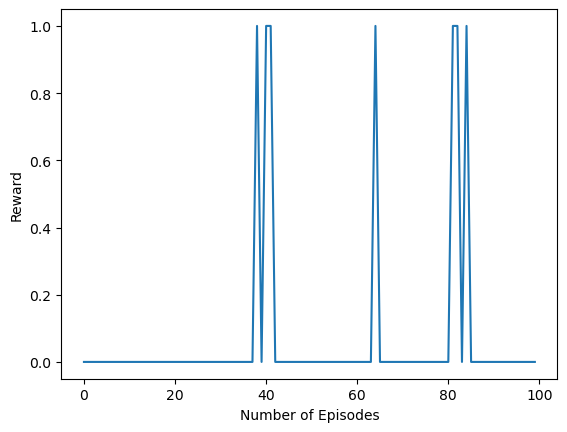

In [13]:
# Visualize the reward
plt.figure()
plt.plot(reward_list)
plt.xlabel("Number of Episodes")
plt.ylabel("Reward")
plt.show()

In [10]:
q_table

array([[1.63448695, 1.57811727, 1.57017553, 1.8       ],
       [1.33768368, 1.0011904 , 1.00620487, 1.8       ],
       [1.56464111, 1.2709987 , 0.88801684, 1.8       ],
       [1.4050486 , 1.02923821, 1.09006714, 1.8       ],
       [0.98058491, 0.43777624, 1.20980989, 0.68491174],
       [0.        , 0.        , 0.        , 0.        ],
       [1.1666757 , 0.22434689, 0.4182651 , 0.24879237],
       [0.        , 0.        , 0.        , 0.        ],
       [0.54306326, 0.78586095, 0.34628148, 0.96095415],
       [0.96772964, 0.94606814, 0.46017716, 0.39065083],
       [0.37310851, 0.22043149, 0.22254466, 0.2010994 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4423858 , 0.62895416, 0.76825347, 0.44642054],
       [0.64531098, 0.90232491, 0.61710802, 0.604675  ],
       [0.        , 0.        , 0.        , 0.        ]])